# Procesamiento de imágenes #03
### Clases de datos

Dra. C. Miriela Escobedo Nicot

### Clases de datos
Para las coordenadas de una imagen se trabaja con valores enteros, sin embargo los valores de los píxeles no se restringen a enteros.

En Python podemos trabajar con imágenes que usan diferentes tipos de datos para almacenar los valores de un pixel

Nombre | Descripción
-- | --
float64 | Doble precisión, números decimales con punto flotante
uint8 | Enteros sin signo de 8 bits en un rango [0, 255]
uint16 | Enteros sin signo de 16 bits en un rango [0, 65535]
uint32 | Enteros sin signo de 32 bits
int8 | Enteros con signo de 8 bits en un rango [-128, 127]
int16 | Enteros con signo de 16 bits
int32 | Enteros con signo de 32 bits
bool | Valores de True o False, tambien representados por 0 y 1

### Tipos de imágenes

* Imágenes de intensidad
* Imágenes binarias
* Imágenes indexadas
* Imágenes RGB

La mayoría de las operaciones del procesamiento de imágenes monocromáticas se lleva a cabo utilizando imágenes binarias o de intensidad, por lo que nuestro enfoque inicial se centrará sobre estos dos tipos de imágenes.

Las imágenes de color RGB y las indexadas serán objeto de un tratamiento posterior.

### Imágenes de intensidad

* Una imagen de intensidad es una matriz cuyos valores se han reducido para representar las intensidades.

* Cuando los elementos de una imagen de intensidad son de clase `uint8`, o `uint16`, tienen valores enteros en el rango [0, 255] y [0, 65535], respectivamente

* Si la imagen es de tipo `float64`, los valores son números en punto flotante. Los valores de intensidad son escalados al intervalo [0, 1]

##### Ejemplo: tomar una imagen en RGB y llevarla a escala de grises y escalar su valor al intervalo [0, 1]

In [1]:
# Importamos las bibliotecas necesarias

from pylab import *
from skimage.color import rgb2gray

In [2]:
# Cargar imagen desde el disco y almacenar su matriz

A = imread("dataset/balloon.jpg")

In [3]:
A.shape

(300, 225, 3)

In [4]:
A.dtype

dtype('uint8')

In [5]:
print(A.min(), A.max()) # Rango [0, 255]

0 255


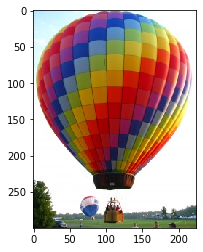

In [6]:
imshow(A)

In [7]:
# Convertir imagen a escala de grises
AG = rgb2gray(A)

In [8]:
AG.shape

(300, 225)

In [9]:
AG.dtype

dtype('float64')

In [10]:
# Rango
print(AG.min(), AG.max())

0.03308470588235294 1.0


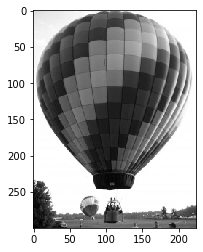

In [11]:
imshow(AG, cmap="gray")

Como podemos ver la función `rgb2gray` nos devuelve la imágen en escala de grises pero con tipo `float64` y escalada en el rango [0, 1], esto se hace para agilizar las operaciones matriciales que se realizan para el procesamiento de las imágenes, y la función `imshow` reconoce automáticamante cuando una imagen esta reescalada para mostrarla de manera correcta.

### Imágenes binarias

* Una imagen binaria es una matriz lógica de 0 y 1. 
* En el caso de Python se ven representadas por los valores True y False, correspondientes por 1 y 0 respectivamente, y su tipo de datos es `bool`.

##### Ejemplo de imagen binaria

In [12]:
from skimage.data import horse # importar imagen del dataset de la biblioteca skimage

In [13]:
binary_image = horse() # cargar imagen

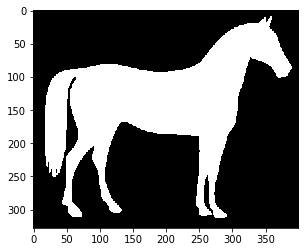

In [14]:
imshow(binary_image, cmap="binary")

In [15]:
binary_image.dtype

dtype('bool')

In [16]:
binary_image

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

##### Guardar una imagen binaria

In [17]:
imsave("dataset/outputs/binary_image.jpg", binary_image, cmap="binary")

Sin embargo cuando volvemos a cargar esta imagen desde el disco se carga como una imagen con formato RGB

In [18]:
T = imread("dataset/outputs/binary_image.jpg")

In [19]:
T.shape

(328, 400, 3)

In [20]:
T.dtype

dtype('uint8')

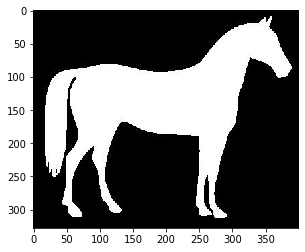

In [21]:
imshow(T)

In [22]:
print(T.min(), T.max())

0 255


Posteriormente se estudiaran métodos efectivos para convertir imágenes desde escala de grises a binarias.

Ahora podemos ver un ejemplo sencillo de como binarizar una imagen en Python.

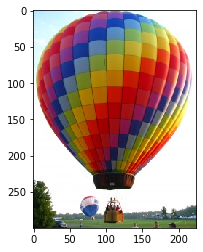

In [23]:
imshow(A) # Tenemos esta imagen almacenada en A

Lo que podemos hacer es convertir a $A$ a escala de grises y luego comparar cada uno de sus valores con 0.5, los que sean menores seran llevados a `True` y los que sean mayores a `False`

In [24]:
ABin = rgb2gray(A) < 0.5

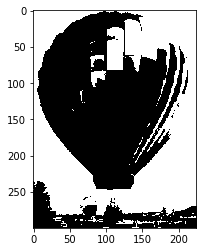

In [25]:
imshow(ABin, cmap="binary")

Al número con que se comparan los valores de los pixeles para realizar este procedimiento se le llama umbral.

In [26]:
imsave("dataset/outputs/balloon_binary.jpg", ABin, cmap="binary")